In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Data importing

In [2]:
df = pd.read_csv("data.csv") #importing data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


In [4]:
df.head(20)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,29,1991-06-28,181,70,Belgium,Manchester City,...,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,21,1998-12-20,178,73,France,Paris Saint-Germain,...,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,28,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
8,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,28,1991-07-08,193,92,Netherlands,Liverpool,...,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3
9,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,27,1992-10-02,191,91,Brazil,Liverpool,...,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3


## Data cleaning

In [5]:
df.drop(['sofifa_id',"player_url",'long_name',"dob","team_jersey_number","nation_jersey_number"],axis =1,inplace = True)

Dropping sofifa_id,player_url,team_jersey_number,nation_jersey_number and long_name because they are used for player identification and that can be done using short_name column 
Dropping dob as it can only be used to tell age and we already have age column 

In [6]:
df["body_type"].unique()


array(['Messi', 'C. Ronaldo', 'PLAYER_BODY_TYPE_259',
       'PLAYER_BODY_TYPE_276', 'Neymar', 'PLAYER_BODY_TYPE_321',
       'PLAYER_BODY_TYPE_343', 'PLAYER_BODY_TYPE_262',
       'PLAYER_BODY_TYPE_314', 'PLAYER_BODY_TYPE_312',
       'PLAYER_BODY_TYPE_313', 'Mohamed Salah', 'Courtois',
       'PLAYER_BODY_TYPE_322', 'PLAYER_BODY_TYPE_352', 'Normal',
       'PLAYER_BODY_TYPE_273', 'PLAYER_BODY_TYPE_358',
       'PLAYER_BODY_TYPE_325', 'PLAYER_BODY_TYPE_320', 'Lean',
       'PLAYER_BODY_TYPE_368', 'PLAYER_BODY_TYPE_342',
       'PLAYER_BODY_TYPE_300', 'PLAYER_BODY_TYPE_356',
       'PLAYER_BODY_TYPE_336', 'PLAYER_BODY_TYPE_283',
       'PLAYER_BODY_TYPE_316', 'PLAYER_BODY_TYPE_319',
       'PLAYER_BODY_TYPE_311', 'PLAYER_BODY_TYPE_310',
       'PLAYER_BODY_TYPE_365', 'PLAYER_BODY_TYPE_374',
       'PLAYER_BODY_TYPE_345', 'PLAYER_BODY_TYPE_253',
       'PLAYER_BODY_TYPE_305', 'PLAYER_BODY_TYPE_266',
       'PLAYER_BODY_TYPE_366', 'PLAYER_BODY_TYPE_315',
       'PLAYER_BODY_TYPE_351', 'P

In [7]:
df.drop("body_type",axis=1,inplace = True)

Dropping body_type as it contains alot of inconsistent data such as player_body_type_377,player name etc which are not possible to fill in 


In [8]:
columns_na = ["loaned_from","player_tags","nation_position","club_name","defending_marking"] #Making a list of columns to check the percentage of na values in them
na_data=[]
for col in columns_na :    
    na_percentage = (df[col].isnull().sum() / df[col].size) * 100
    na_data.append([col, na_percentage])


na_percentages_df = pd.DataFrame(na_data, columns=["Column_name", "Percentage_na"])
na_percentages_df


,Column_name,Percentage_na
0,loaned_from,95.998733
1,player_tags,92.567568
2,nation_position,94.050887
3,club_name,1.187711
4,defending_marking,100.000000


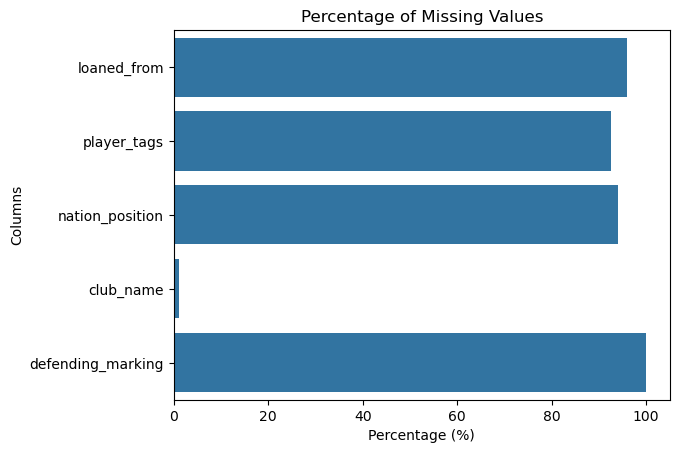

In [9]:
sns.barplot(data=na_percentages_df,x='Percentage_na',y='Column_name',legend=False).set(title="Percentage of Missing Values", ylabel="Columns", xlabel="Percentage (%)")
pl.show()

As we can see the columns loaned_from,player_tags,nation_position,defending_marking has more than 90% Na values thus we will drop those columns and we can see less than 2% values in club_name thus we can drop rows with na values in club_name column

In [10]:
df.drop(["loaned_from",'player_tags','nation_position','defending_marking'],axis=1,inplace = True)

In [11]:
df.dropna(subset ="club_name",inplace = True)

In [12]:
df.drop("joined",axis =1,inplace = True) 

In [13]:
df["weak_foot"]

0        4
1        4
2        3
3        4
4        5
        ..
18939    2
18940    2
18941    2
18942    2
18943    2
Name: weak_foot, Length: 18719, dtype: int64

In [14]:
df.drop(["weak_foot","skill_moves","real_face"],axis=1,inplace = True)

Dropping weak_foot column as it should contain left or right foot but it contains integer values 

#### Converting the columns from st to rb into string and then replacing the numbers which dont have anything after plus sign into + 0 using replace function

In [15]:
# Replace strings ending with '+' to '0'
columns = [df.columns[65:91]] 
for col in columns :
    df[col] = df[col].astype('string') #converting the columns to string
for col in columns :
    df[col] = df[col].replace(r'\+$', '+0', regex=True)#replacing all the places where there is no number ahead of + sign
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18719 entries, 0 to 18943
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18719 non-null  object 
 1   age                         18719 non-null  int64  
 2   height_cm                   18719 non-null  int64  
 3   weight_kg                   18719 non-null  int64  
 4   nationality                 18719 non-null  object 
 5   club_name                   18719 non-null  object 
 6   league_name                 18719 non-null  object 
 7   league_rank                 18719 non-null  float64
 8   overall                     18719 non-null  int64  
 9   potential                   18719 non-null  int64  
 10  value_eur                   18719 non-null  int64  
 11  wage_eur                    18719 non-null  int64  
 12  player_positions            18719 non-null  object 
 13  preferred_foot              18719 no

#### Solving the Equation in strings for example "90+1" using eval function

In [16]:
# Solving string equations using the eval function 
df['ls'] = df['ls'].apply(lambda x : eval(x))
df['st'] = df['st'].apply(lambda x : eval(x))
df['rs'] = df['rs'].apply(lambda x : eval(x))
df['lw'] = df['lw'].apply(lambda x : eval(x))
df['lf'] = df['lf'].apply(lambda x : eval(x))
df['cf'] = df['cf'].apply(lambda x : eval(x))
df['rf'] = df['rf'].apply(lambda x : eval(x))
df['rw'] = df['rw'].apply(lambda x : eval(x))
df['lam'] = df['lam'].apply(lambda x : eval(x))
df['cam'] = df['cam'].apply(lambda x : eval(x))
df['ram'] = df['ram'].apply(lambda x : eval(x))
df['lm'] = df['lm'].apply(lambda x : eval(x))
df['lcm'] = df['lcm'].apply(lambda x : eval(x))
df['cm'] = df['cm'].apply(lambda x : eval(x))
df['rcm'] = df['rcm'].apply(lambda x : eval(x))
df['rm'] = df['rm'].apply(lambda x : eval(x))
df['lwb'] = df['lwb'].apply(lambda x : eval(x))
df['ldm'] = df['ldm'].apply(lambda x : eval(x))
df['cdm'] = df['cdm'].apply(lambda x : eval(x))
df['rdm'] = df['rdm'].apply(lambda x : eval(x))
df['rwb'] = df['rwb'].apply(lambda x : eval(x))
df['lb'] = df['lb'].apply(lambda x : eval(x))
df['lcb'] = df['lcb'].apply(lambda x : eval(x))
df['cb'] = df['cb'].apply(lambda x : eval(x))
df['rcb'] = df['rcb'].apply(lambda x : eval(x))
df['rb'] = df['rb'].apply(lambda x : eval(x))


#### Now taking mean of these columns and storing them in new columns named forward ,back ,mid and Gk

In [17]:
# Taking mean of forward(ST,LS,CF etc),mid(RM,CM,lM etc) and back (lb,lcb,rcb) position and storing it in Forward, Mid and Back respectively
df['Forward'] = df.iloc[:, 65:76].mean(axis=1)#axis = 1 means calculations are performed across columns rather than rows
df['Mid'] = df.iloc[:, 76:81].mean(axis=1)
df['Back'] = df.iloc[:, 81:91].mean(axis=1)
df["GK"] = df.iloc[:,60:65].mean(axis=1) #additional gk column for goalkeeper position
df[['Forward','Mid','Back','GK']]


,Forward,Mid,Back,GK
0,92.545455,91.2,63.7,10.8
1,90.909091,86.8,62.7,11.6
2,36.363636,39.8,36.5,87.4
3,88.000000,83.6,65.5,10.2
4,89.181818,88.0,62.1,11.8
...,...,...,...,...
18939,46.727273,49.4,48.7,9.0
18940,31.363636,33.6,45.8,10.6
18941,34.363636,37.0,45.9,12.6
18942,46.545455,49.0,50.2,9.4



Explanation of Forward,mid and back stat:

High forward stat indicates suitability for offensive positions like ST, LW, RW, CF,etc.

High midfielder stat suggests suitability for CM, RM, RCM, LCM, etc.

High defender stat indicates suitability for LWB, LB, CB, etc.

High GK stats suggest suitability for the goalkeeper position.

Complete analysis on Forward, Midfielder, and Defender in the Position analysis section

In [18]:
#Dropping all position value column(CB,CM,ST etc)
for col in columns:
    df.drop(col,axis=1,inplace = True)

In [19]:
df.head(11)

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Forward,Mid,Back,GK
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,24,6,11,15,14,8,92.545455,91.2,63.7,10.8
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,24,7,11,15,14,11,90.909091,86.8,62.7,11.6
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,18,87,92,78,90,90,36.363636,39.8,36.5,87.4
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,19,15,6,12,8,10,88.000000,83.6,65.5,10.2
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,29,9,9,15,15,11,89.181818,88.0,62.1,11.8
5,K. De Bruyne,29,181,70,Belgium,Manchester City,English Premier League,1.0,91,91,...,53,15,13,5,10,13,88.272727,91.0,78.5,11.2
6,K. Mbappé,21,178,73,France,Paris Saint-Germain,French Ligue 1,1.0,90,95,...,32,13,5,7,11,6,89.818182,85.2,64.4,8.4
7,M. ter Stegen,28,187,85,Germany,FC Barcelona,Spain Primera Division,1.0,90,93,...,10,88,85,88,88,90,39.181818,45.6,38.0,87.8
8,V. van Dijk,28,193,92,Netherlands,Liverpool,English Premier League,1.0,90,91,...,86,13,10,13,11,11,71.000000,76.6,87.3,11.6
9,Alisson,27,191,91,Brazil,Liverpool,English Premier League,1.0,90,91,...,16,86,88,85,91,89,39.090909,42.2,34.7,87.8


In [20]:
df.drop(["height_cm","weight_kg",'league_rank','preferred_foot'],axis=1,inplace = True) #These are of no use
df.drop(['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],axis =1,inplace = True) #These are duplicate columns 

Dropping gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning as the same values for each row is present in goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_reflexes,goalkeeping_speed,goalkeeping_positioning


In [21]:
(df["release_clause_eur"].isnull().sum())/(df["release_clause_eur"]).size*100

4.113467599764944

As we can see only 4% of data in release_clause_eur is null thus we can drop those rows

In [22]:
df.dropna(subset = "release_clause_eur",inplace = True)

In [23]:
df.drop(["player_traits","work_rate","international_reputation"],axis =1 ,inplace = True)#no use of these columns

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17949 entries, 0 to 18943
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  17949 non-null  object 
 1   age                         17949 non-null  int64  
 2   nationality                 17949 non-null  object 
 3   club_name                   17949 non-null  object 
 4   league_name                 17949 non-null  object 
 5   overall                     17949 non-null  int64  
 6   potential                   17949 non-null  int64  
 7   value_eur                   17949 non-null  int64  
 8   wage_eur                    17949 non-null  int64  
 9   player_positions            17949 non-null  object 
 10  release_clause_eur          17949 non-null  float64
 11  team_position               17949 non-null  object 
 12  contract_valid_until        17949 non-null  float64
 13  pace                        15959 no

In [25]:

df["shooting"] = df["shooting"].fillna(0) #filling na values with 0
for i in range(17949) :
    if df.iloc[i,14] ==0 : #finding location of na values
        df.iloc[i,14] = (df.iloc[i,23]+df.iloc[i,34]+df.iloc[i,38]+df.iloc[i,49])/4 # replacing these na values with mean of various attribute
        
df["pace"]= df["pace"].fillna(0)
for i in range(17949) :
    if df.iloc[i,13] ==0 :
        df.iloc[i,13] = (df.iloc[i,29]+df.iloc[i,30]+df.iloc[i,31]+df.iloc[i,36])/4

df["passing"] = df["passing"].fillna(0)
for i in range(17949) :
    if df.iloc[i,15] ==0 :
        df.iloc[i,15] = (df.iloc[i,22]+df.iloc[i,27]+df.iloc[i,38]+df.iloc[i,19])/4

df["dribbling"] = df["dribbling"].fillna(0)
for i in range(17949) :
    if df.iloc[i,16] ==0 :
        df.iloc[i,16] = (df.iloc[i,24]+df.iloc[i,28]+df.iloc[i,33]+df.iloc[i,44])/4

df["defending"] = df["defending"].fillna(0)
for i in range(17949) :
    if df.iloc[i,17] ==0 :
        df.iloc[i,17] = (df.iloc[i,45]+df.iloc[i,46]+df.iloc[i,40])/3



In the above cell, we are filling na values of shooting, pace, passing, dribbling, and defending by taking mean of different attributes such as :

For Shooting mean of attacking_volleys, power_shot_power, power_long_shots, goalkeeping_kicking is taken. 

For Pace mean of movement_acceleration, movement_sprint_speed, movement_agility, power_stamina is taken.

For Passing mean of attacking_short_passing, skill_long_passing, power_long_shots,attacking_crossing  is taken.

For Dribbling mean of skill_dribbling,skill_ball_control,movement_balance,mentality_composure is taken.

For Defending mean of defending_standing_tackle,defending_sliding_tackle,mentality_interceptions is taken.


In [26]:
df.drop(df.columns[18:52],axis = 1,inplace = True) #dropping the columns which are used in the above cell

In [27]:
df.head(100)

,short_name,age,nationality,club_name,league_name,overall,potential,value_eur,wage_eur,player_positions,...,contract_valid_until,pace,shooting,passing,dribbling,defending,Forward,Mid,Back,GK
0,L. Messi,33,Argentina,FC Barcelona,Spain Primera Division,93,93,67500000,560000,"RW, ST, CF",...,2021.0,85.00,92.0,91.0,95.00,38.000000,92.545455,91.2,63.7,10.8
1,Cristiano Ronaldo,35,Portugal,Juventus,Italian Serie A,92,92,46000000,220000,"ST, LW",...,2022.0,89.00,93.0,81.0,89.00,35.000000,90.909091,86.8,62.7,11.6
2,J. Oblak,27,Slovenia,Atlético Madrid,Spain Primera Division,91,93,75000000,125000,GK,...,2023.0,52.75,40.5,27.0,39.75,16.333333,36.363636,39.8,36.5,87.4
3,R. Lewandowski,31,Poland,FC Bayern München,German 1. Bundesliga,91,91,80000000,240000,ST,...,2023.0,78.00,91.0,78.0,85.00,43.000000,88.000000,83.6,65.5,10.2
4,Neymar Jr,28,Brazil,Paris Saint-Germain,French Ligue 1,91,91,90000000,270000,"LW, CAM",...,2022.0,91.00,85.0,86.0,94.00,36.000000,89.181818,88.0,62.1,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Alex Sandro,29,Brazil,Juventus,Italian Serie A,85,85,31500000,120000,"LB, LM",...,2023.0,81.00,65.0,77.0,80.00,81.000000,77.000000,80.4,83.8,8.0
96,Koke,28,Spain,Atlético Madrid,Spain Primera Division,85,85,38000000,92000,"CM, RM, LM",...,2024.0,67.00,75.0,85.0,81.00,76.000000,81.363636,85.0,82.4,10.8
97,L. Insigne,29,Italy,Napoli,Italian Serie A,85,85,37500000,120000,"LW, CF",...,2022.0,88.00,78.0,83.0,91.00,36.000000,83.363636,82.0,57.5,9.0
98,R. Mahrez,29,Algeria,Manchester City,English Premier League,85,85,37500000,210000,"RW, RM",...,2023.0,83.00,79.0,81.0,90.00,38.000000,82.909091,82.0,60.0,10.8


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17949 entries, 0 to 18943
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   short_name            17949 non-null  object 
 1   age                   17949 non-null  int64  
 2   nationality           17949 non-null  object 
 3   club_name             17949 non-null  object 
 4   league_name           17949 non-null  object 
 5   overall               17949 non-null  int64  
 6   potential             17949 non-null  int64  
 7   value_eur             17949 non-null  int64  
 8   wage_eur              17949 non-null  int64  
 9   player_positions      17949 non-null  object 
 10  release_clause_eur    17949 non-null  float64
 11  team_position         17949 non-null  object 
 12  contract_valid_until  17949 non-null  float64
 13  pace                  17949 non-null  float64
 14  shooting              17949 non-null  float64
 15  passing               17

# Data Analysis

### Linear Regression analysis 

##### Forward vs pace,shooting,passing,dribbling and defending

In this section we will look how forward stat changes with various attributes such as pace,shooting,passing,dribbling and defending¶

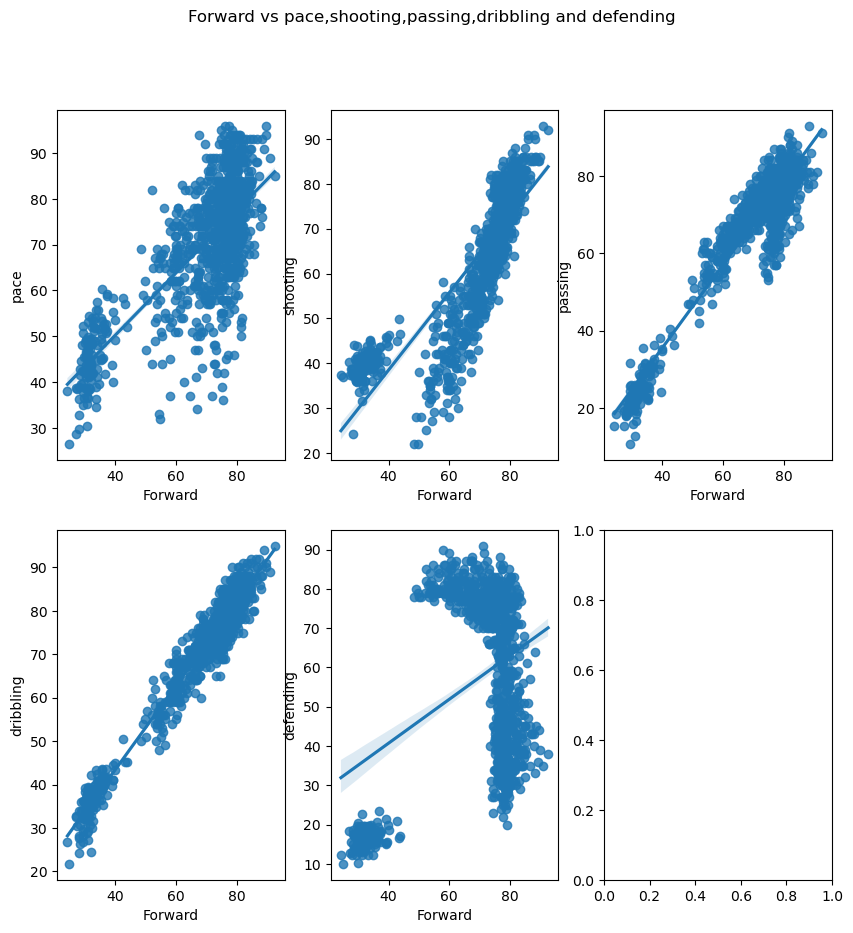

In [29]:
fig, axes = pl.subplots(2,3 , figsize=(10, 10)) #creating a grid for subplots
 
fig.suptitle('Forward vs pace,shooting,passing,dribbling and defending') #title for the plot
 
sns.regplot(ax=axes[0, 0], data=df.head(1000), x='Forward', y='pace') #creating a linear regression plot 
sns.regplot(ax=axes[0, 1], data=df.head(1000), x='Forward', y='shooting')
sns.regplot(ax=axes[0, 2], data=df.head(1000), x='Forward', y='passing')
sns.regplot(ax=axes[1, 0], data=df.head(1000), x='Forward', y='dribbling')
sns.regplot(ax=axes[1, 1], data=df.head(1000), x='Forward', y='defending');


These graphs show the relationships between the "Forward" metric and five other metrics: pace, shooting, passing, dribbling, and defending.

Pace: Positive correlation; pace increases as the forward metric increases.

Shooting: Strong positive correlation; higher forward metrics are associated with higher shooting metrics.

Passing: Positive correlation; players with higher forward metrics generally have better passing skills.

Dribbling: Strong positive correlation; higher forward metrics are associated with higher dribbling metrics.

Defending: Weak positive correlation; data points are more scattered, showing a less consistent relationship.

Overall, the "Forward" metric shows strong positive relationships with pace, shooting, passing, and dribbling, but a weaker relationship with defending.

##### Mid vs pace,shooting,passing,dribbling and defending

In this section we will look how mid stat changes with various attributes such as pace,shooting,passing,dribbling and defending¶

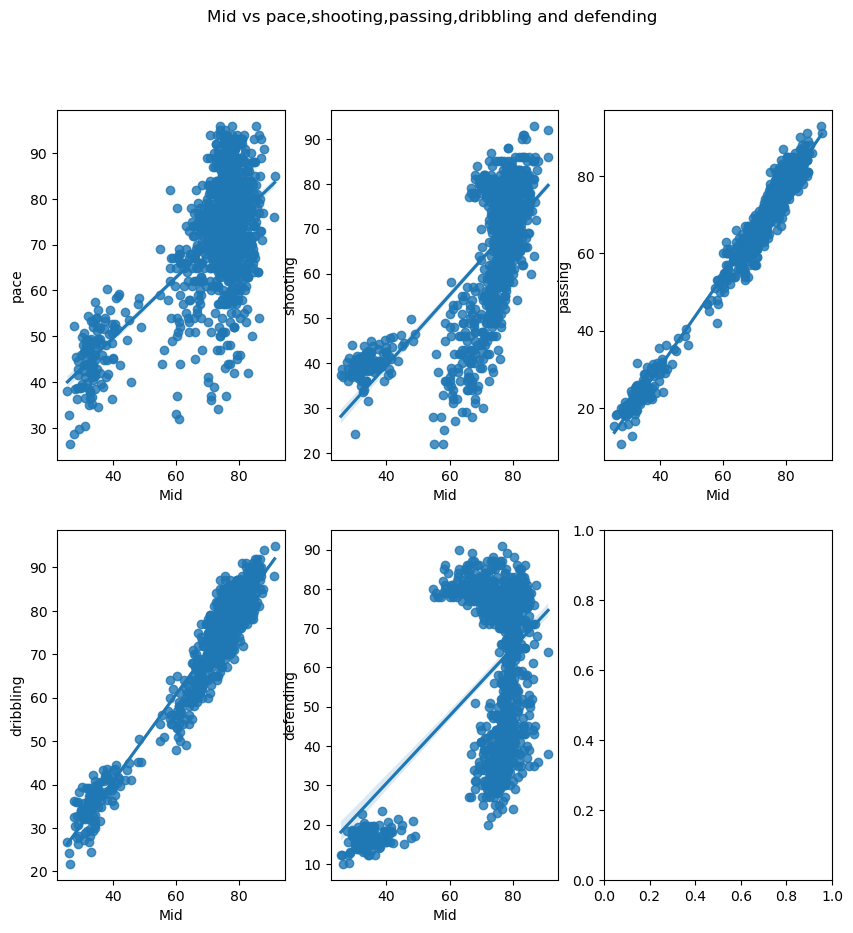

In [30]:
fig, axes = pl.subplots(2,3 , figsize=(10, 10))
 
fig.suptitle('Mid vs pace,shooting,passing,dribbling and defending')
 
sns.regplot(ax=axes[0, 0], data=df.head(1000), x='Mid', y='pace')
sns.regplot(ax=axes[0, 1], data=df.head(1000), x='Mid', y='shooting')
sns.regplot(ax=axes[0, 2], data=df.head(1000), x='Mid', y='passing')
sns.regplot(ax=axes[1, 0], data=df.head(1000), x='Mid', y='dribbling')
sns.regplot(ax=axes[1, 1], data=df.head(1000), x='Mid', y='defending');

These graphs show the relationships between the "Mid" metric and five other metrics: pace, shooting, passing, dribbling, and defending.

Pace: Positive correlation; pace increases as the mid metric increases.

Shooting: Positive correlation; players with higher mid metrics tend to have higher shooting metrics.

Passing: Strong positive correlation; players with higher mid metrics generally have better passing skills.

Dribbling: Strong positive correlation; higher mid metrics are associated with higher dribbling metrics.

Defending: Positive correlation, but weaker compared to other metrics; data points are more scattered, showing a less consistent relationship.

Overall, the "Mid" metric shows strong positive relationships with pace, shooting, passing, and dribbling, but a weaker relationship with defending.

##### Back vs pace,shooting,passing,dribbling and defending¶

In this section we will look how back stat changes with various attributes such as pace,shooting,passing,dribbling and defending¶

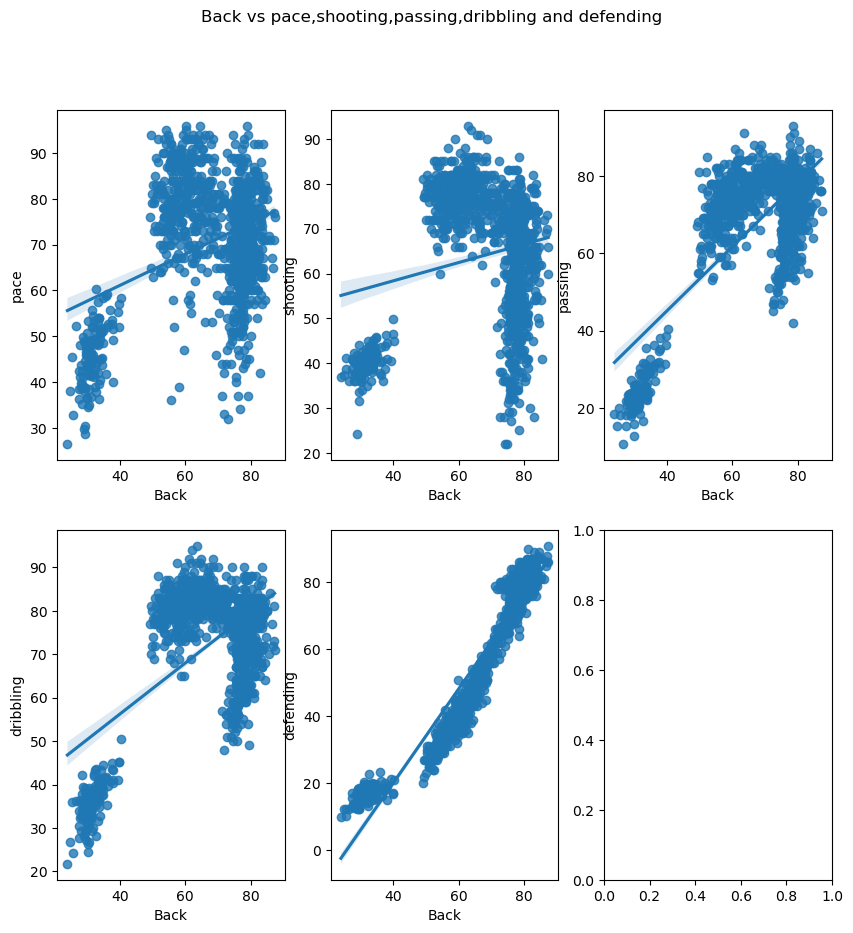

In [31]:
fig, axes = pl.subplots(2,3 , figsize=(10, 10))
fig.suptitle('Back vs pace,shooting,passing,dribbling and defending')
 
sns.regplot(ax=axes[0, 0], data=df.head(1000), x='Back', y='pace')
sns.regplot(ax=axes[0, 1], data=df.head(1000), x='Back', y='shooting')
sns.regplot(ax=axes[0, 2], data=df.head(1000), x='Back', y='passing')
sns.regplot(ax=axes[1, 0], data=df.head(1000), x='Back', y='dribbling')
sns.regplot(ax=axes[1, 1], data=df.head(1000), x='Back', y='defending');

These graphs show the relationships between the "Back" metric and five other metrics: pace, shooting, passing, dribbling, and defending.

Pace: Weak positive correlation; pace shows a slight increase as the back metric increases.

Shooting: Weak positive correlation; higher back metrics are associated with slightly higher shooting metrics.

Passing: Positive correlation; players with higher back metrics generally have better passing skills.

Dribbling: Moderate positive correlation; higher back metrics are associated with higher dribbling metrics.

Defending: Strong positive correlation; players with higher back metrics tend to have significantly higher defending metrics.

Overall, the "Back" metric shows the strongest positive relationship with defending, moderate positive relationships with passing and dribbling, and weaker positive relationships with pace and shooting.

##### GK vs pace,shooting,passing,dribbling and defending¶

In this section we will look how GK stat changes with various attributes such as pace,shooting,passing,dribbling and defending¶

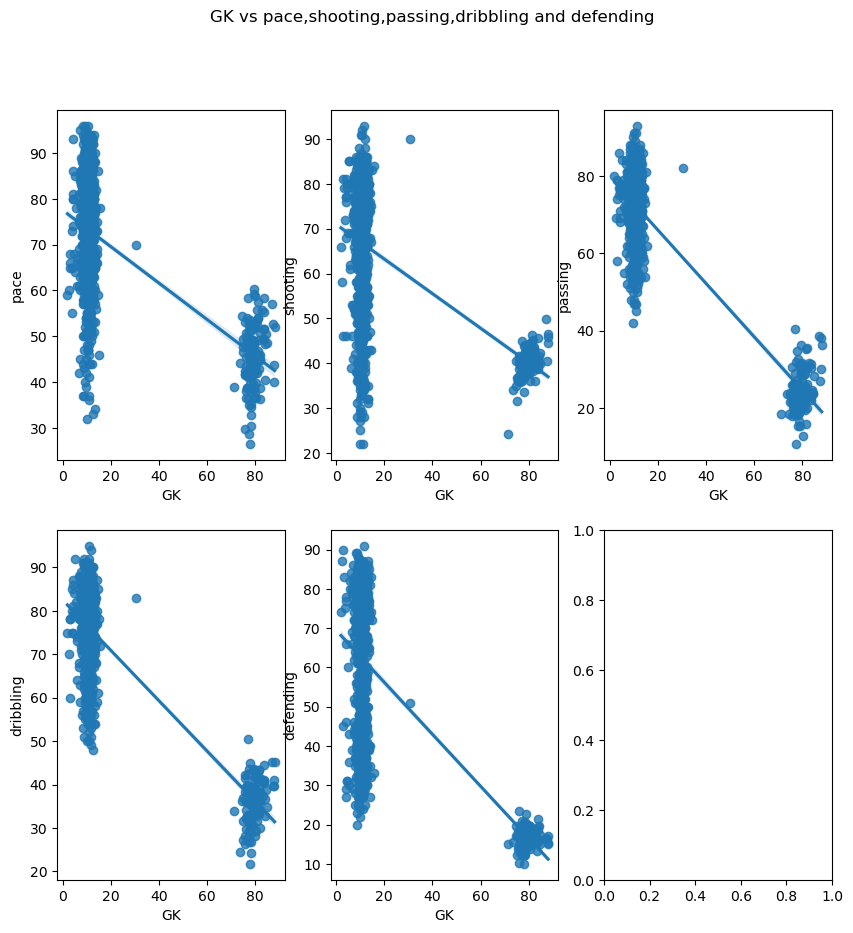

In [32]:
fig, axes = pl.subplots(2,3 , figsize=(10, 10))
fig.suptitle('GK vs pace,shooting,passing,dribbling and defending')
 
sns.regplot(ax=axes[0, 0], data=df.head(1000), x='GK', y='pace')
sns.regplot(ax=axes[0, 1], data=df.head(1000), x='GK', y='shooting')
sns.regplot(ax=axes[0, 2], data=df.head(1000), x='GK', y='passing')
sns.regplot(ax=axes[1, 0], data=df.head(1000), x='GK', y='dribbling')
sns.regplot(ax=axes[1, 1], data=df.head(1000), x='GK', y='defending');

These graphs show the relationships between the "Back" metric and five other metrics: pace, shooting, passing, dribbling, and defending.

Negative Correlation: All plots show a negative correlation between GK rating and each of the other attributes.

Pace: Higher GK ratings are associated with lower pace ratings.

Shooting: Higher GK ratings correspond to lower shooting ratings.

Passing: Higher GK ratings are linked with lower passing ratings.

Dribbling: Higher GK ratings correlate with lower dribbling ratings.

Defending: Higher GK ratings are related to lower defending ratings.

Overall, as the GK rating increases, the ratings for pace, shooting, passing, dribbling, and defending decrease, suggesting that players with high goalkeeping skills tend to have lower ratings in these other attributes.

#### Player value vs Wage(eur)

In this section we will see how Player value Changes with Wage.

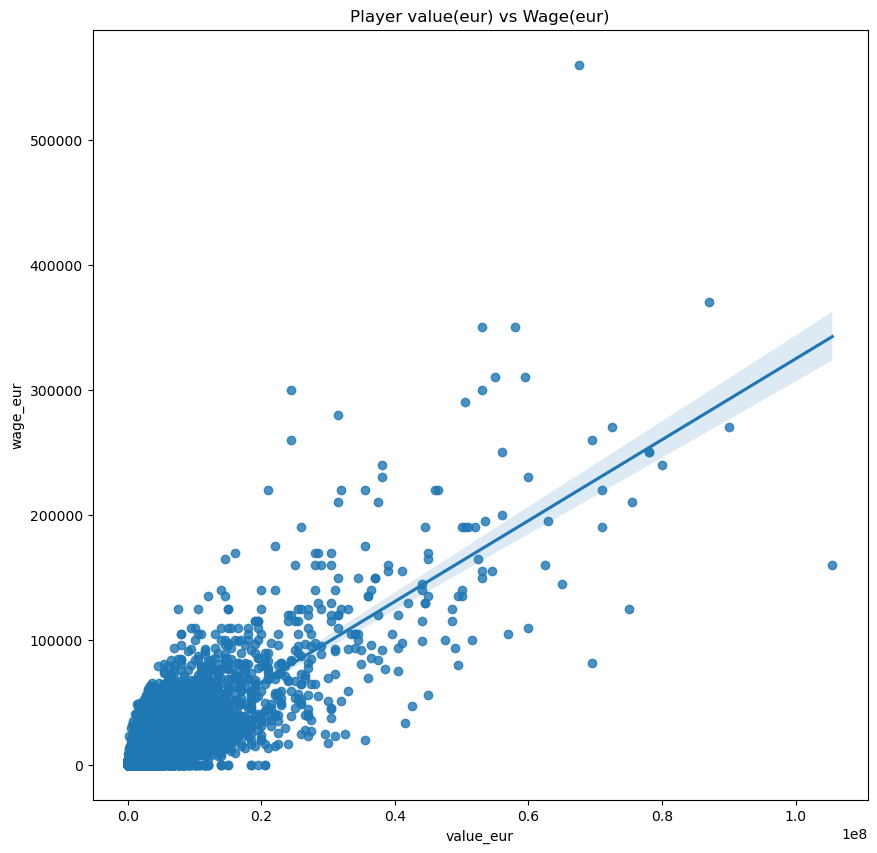

In [33]:
fig=pl.subplots(figsize= (10,10)) 
pl.title("Player value(eur) vs Wage(eur)")
sns.regplot(data = df ,x= "value_eur",y="wage_eur"); 

The plot indicates a positive relationship between player value and wage, with higher-valued players generally earning higher wages. However, there is variability in the data, as indicated by the scatter of points and the presence of outliers. This variability suggests that while player value is a strong predictor of wage, other factors may also play a significant role in determining player wages.

### Position analysis


In this analysis we will see how different player position react to forward,mid,back and gk stat

In [34]:
positions = np.array(df["team_position"]) # creating an array of player positions
positions = np.unique(positions) # removing the duplicates 
positions

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RES', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB'],
      dtype=object)

In [35]:
elements_to_remove = {'SUB', 'RES'}
filtered_positions = positions[~np.isin(positions, list(elements_to_remove))]# Remove the elements using boolean indexing

In [36]:
filtered_positions

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [37]:
#Creating a new data set for each position in the filtered_position array
for posi in filtered_positions :
    globals()[posi+"_players"] = df[df['team_position']==posi] # using globals() function to name the datasets according to their player position  

# Mean of Forward values for each position
for posi in filtered_positions :
    globals()["mean_fwd_"+posi] = globals()[posi+"_players"]['Forward'].mean()
# Mean of Mid values for each position
for posi in filtered_positions :
    globals()["mean_mid_"+posi] = globals()[posi+"_players"]['Mid'].mean()
# Mean of Back values for each position
for posi in filtered_positions :
    globals()["mean_back_"+posi] = globals()[posi+"_players"]['Back'].mean()
# Mean of Forward GK for each position
for posi in filtered_positions :
    globals()["mean_GK_"+posi] = globals()[posi+"_players"]['GK'].mean()
    


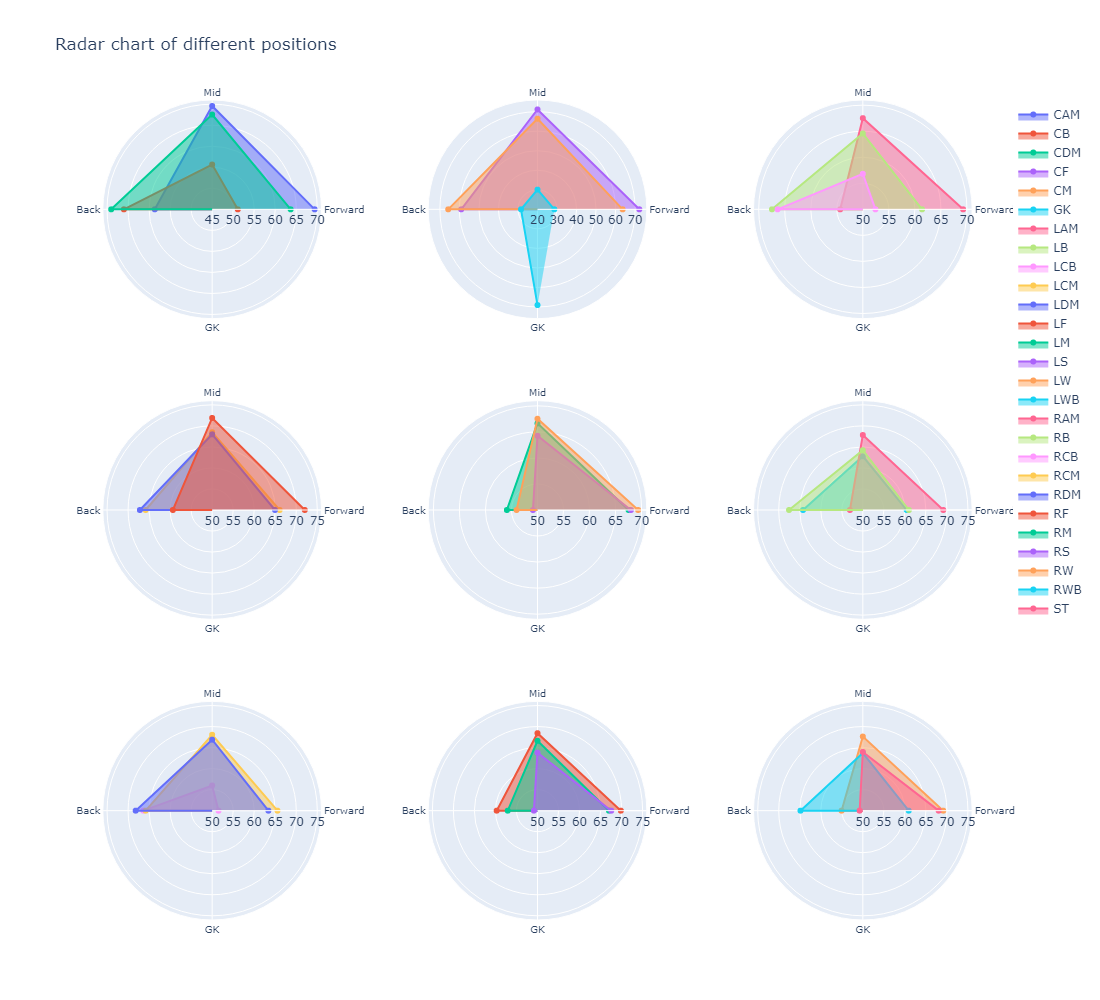

In [38]:
# Create a subplot with 3 row and 3 columns
fig = make_subplots(rows=3, cols=3, specs=[[{'type': 'polar'}]*3]*3)
# Adding radar plots to each subplot using Plotly library
for posi in filtered_positions[0:3] : #plotting radar plot with 3 player positions 
    fig.add_trace(go.Scatterpolar(
            r=[globals()["mean_fwd_"+posi],globals()["mean_mid_"+posi], globals()["mean_back_"+posi],globals()["mean_GK_"+posi]], # filling the graph plots with forward,mid,back and gk values of each position
            theta=["Forward","Mid","Back","GK"], #corners for the plot
            fill='toself', 
            name = str(posi)),row =1 , col = 1)#name for the of the trace which will be seen in the legend
                  
for posi in filtered_positions[3:6]:
    fig.add_trace(go.Scatterpolar(
            r=[globals()["mean_fwd_"+posi],globals()["mean_mid_"+posi], globals()["mean_back_"+posi],globals()["mean_GK_"+posi]], 
            theta=["Forward","Mid","Back","GK"],
            fill='toself',
            name = str(posi)),row =1 , col = 2)
                  
for posi in filtered_positions[6:9]:
    fig.add_trace(go.Scatterpolar(
            r=[globals()["mean_fwd_"+posi],globals()["mean_mid_"+posi], globals()["mean_back_"+posi],globals()["mean_GK_"+posi]], 
            theta=["Forward","Mid","Back","GK"],
            fill='toself',
            name = str(posi)),row =1 , col = 3)

for posi in filtered_positions[9:12] :
    fig.add_trace(go.Scatterpolar(
            r=[globals()["mean_fwd_"+posi],globals()["mean_mid_"+posi], globals()["mean_back_"+posi],globals()["mean_GK_"+posi]], 
            theta=["Forward","Mid","Back","GK"],
            fill='toself',
            name = str(posi)),row =2 , col = 1)
    
for posi in filtered_positions[12:15] :
    fig.add_trace(go.Scatterpolar(
            r=[globals()["mean_fwd_"+posi],globals()["mean_mid_"+posi], globals()["mean_back_"+posi],globals()["mean_GK_"+posi]], 
            theta=["Forward","Mid","Back","GK"],
            fill='toself',
            name = str(posi)),row =2 , col = 2)

for posi in filtered_positions[15:18] :
    fig.add_trace(go.Scatterpolar(
            r=[globals()["mean_fwd_"+posi],globals()["mean_mid_"+posi], globals()["mean_back_"+posi],globals()["mean_GK_"+posi]], 
            theta=["Forward","Mid","Back","GK"],
            fill='toself',
            name = str(posi)),row =2 , col = 3)

for posi in filtered_positions[18:21] :
    fig.add_trace(go.Scatterpolar(
            r=[globals()["mean_fwd_"+posi],globals()["mean_mid_"+posi], globals()["mean_back_"+posi],globals()["mean_GK_"+posi]], 
            theta=["Forward","Mid","Back","GK"],
            fill='toself',
            name = str(posi)),row =3 , col = 1)
for posi in filtered_positions[21:24] :
    fig.add_trace(go.Scatterpolar(
            r=[globals()["mean_fwd_"+posi],globals()["mean_mid_"+posi], globals()["mean_back_"+posi],globals()["mean_GK_"+posi]], 
            theta=["Forward","Mid","Back","GK"],
            fill='toself',
            name = str(posi)),row =3 , col = 2)
for posi in filtered_positions[24:27] :
    fig.add_trace(go.Scatterpolar(
            r=[globals()["mean_fwd_"+posi],globals()["mean_mid_"+posi], globals()["mean_back_"+posi],globals()["mean_GK_"+posi]], 
            theta=["Forward","Mid","Back","GK"],
            fill='toself',
            name = str(posi)),row =3 , col = 3)
fig.update_layout(
    title='Radar chart of different positions',
    width=1100,  # Set the width of the plot
    height=1000, # Set the height of the plot
    polar=dict(
        radialaxis=dict(
            range=[45, 71]  # Set the radial range for the radial axis for the plot
        )
    ),
    polar2=dict(
        radialaxis=dict(
            range=[20,76]  
        )
    ),
    polar3=dict(
        radialaxis=dict(
            range=[50, 71] 
        )),
    polar4=dict(
        radialaxis=dict(
            range=[50, 76]  
        )),
    polar5=dict(
        radialaxis=dict(
            range=[50, 71]  
        ) ),
    polar6=dict(
        radialaxis=dict(
            range=[50, 76]  
        ) ),
    polar7=dict(
        radialaxis=dict(
            range=[50, 76]  
        )),
    polar8=dict(
        radialaxis=dict(
            range=[50, 76] 
        )),
    polar9=dict(
        radialaxis=dict(
            range=[50, 76]  
        ),
    
    )
)
# Adjust the font size of theta labels for all subplots
for i in range(1, 4):
    for j in range(1, 4):
        fig.update_polars(
            angularaxis=dict(
                tickfont=dict(size=10)  # Adjust font size here
            ),
            row=i, col=j
        )

fig.show("png") #displaying the graph



Forward Positions (CF, LW, LS, RF, RS, RW): Predominantly strong in the Forward attribute.

Midfield Positions (CAM, CDM, LM, RCM, RAM, RM): Strong in Mid attribute, with some positions also showing strength in Forward.

Defensive Positions (CB, RB, RCB, LWB, RWB): Strong in Back attribute, with some positions also showing strength in Mid.

Goalkeeper (GK): Exclusively strong in the GK attribute.

Balanced Positions (CDM, LWB, RWB, RDM): These positions have a more balanced distribution, strong in Mid and Back attributes.

In conclusion, the data from Forward, Mid, Back and GK can be used to determine a player's position and can also be used for a machine learning model which predicts player's position or suggests a position for a player 

### Club analysis


##### Club vs Value(eur) 

In this section we will see top 10 teams who have the most valued players

In [39]:
#Making a new dataframe which will consist of club name and total player value
club = df.groupby("club_name")["value_eur"].sum().reset_index() 

In [40]:
club = club.sort_values(by = "value_eur",ascending = False) #sorting by total value
club.head(10)

,club_name,value_eur
374,Liverpool,840625000
489,Real Madrid,759250000
386,Manchester City,746500000
214,FC Barcelona,722200000
216,FC Bayern München,609700000
451,Paris Saint-Germain,605675000
131,Chelsea,602275000
64,Atlético Madrid,582500000
387,Manchester United,556130000
612,Tottenham Hotspur,537025000


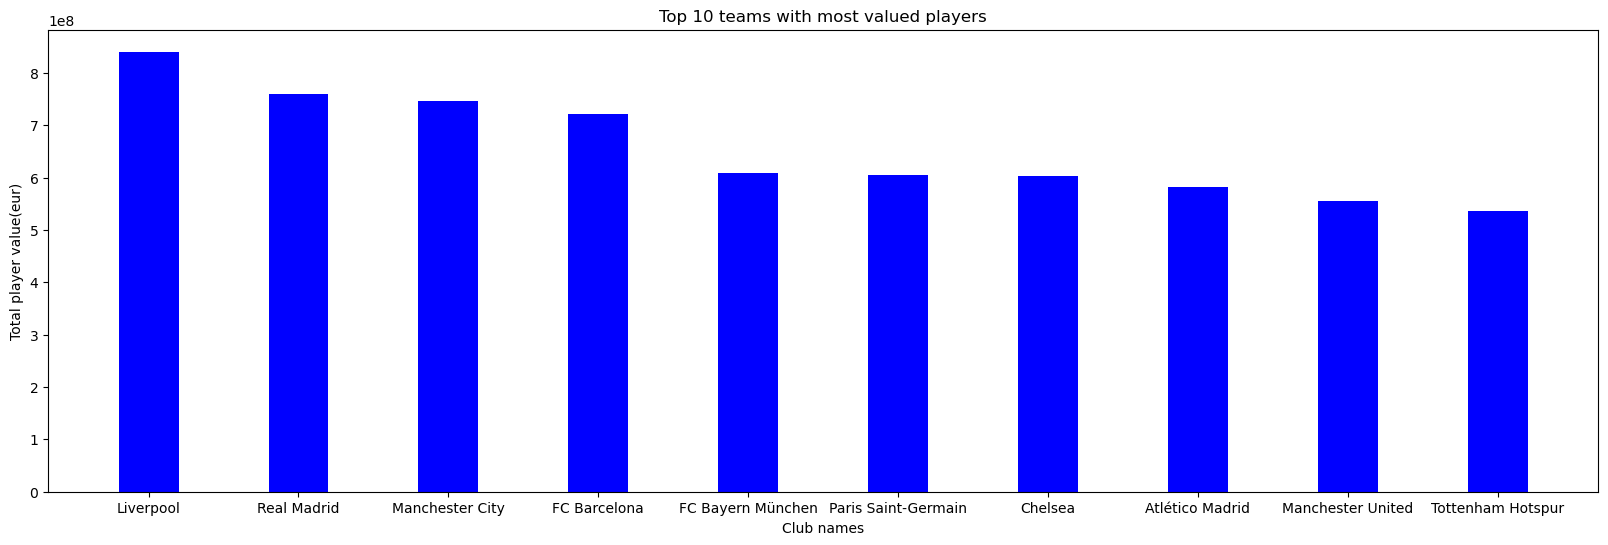

In [41]:
#Plotting the Club vs Total player value graph for the top 10 teams
fig = pl.figure(figsize = (20, 6))

# Creating the bar plot
pl.bar(club["club_name"].head(10), club["value_eur"].head(10), color ='blue', 
        width = 0.4)
pl.xlabel("Club names")
pl.ylabel("Total player value(eur)")
pl.title("Top 10 teams with most valued players")
pl.show()

The graph here shows the top 10 teams with the most valued players and we can see that Liverpool has the highest total player value amongst the other teams, exceeding €800 million. Real Madrid Manchester City and Fc Barcelona follow closely with values between €700 million and €800 million. FC Bayern Munchen, Paris Saint-Germain Chelsea, Atlético Madrid, Manchester United, and Tottenham Hotspur have lower values, indicating a disparity in player market values among these elite teams.

##### Clubs vs Wage(eur)


In [42]:
#Making a new dataframe which will consist of club name and total wage
club = df.groupby("club_name")["wage_eur"].sum().reset_index() 

In [43]:
club = club.sort_values(by = "wage_eur",ascending = False) #sorting by wage_eur
club.head(10)

,club_name,wage_eur
489,Real Madrid,4812000
214,FC Barcelona,4738000
386,Manchester City,3728000
374,Liverpool,3154000
387,Manchester United,2850000
330,Inter,2776000
131,Chelsea,2698000
612,Tottenham Hotspur,2362000
339,Juventus,2161000
451,Paris Saint-Germain,2125550


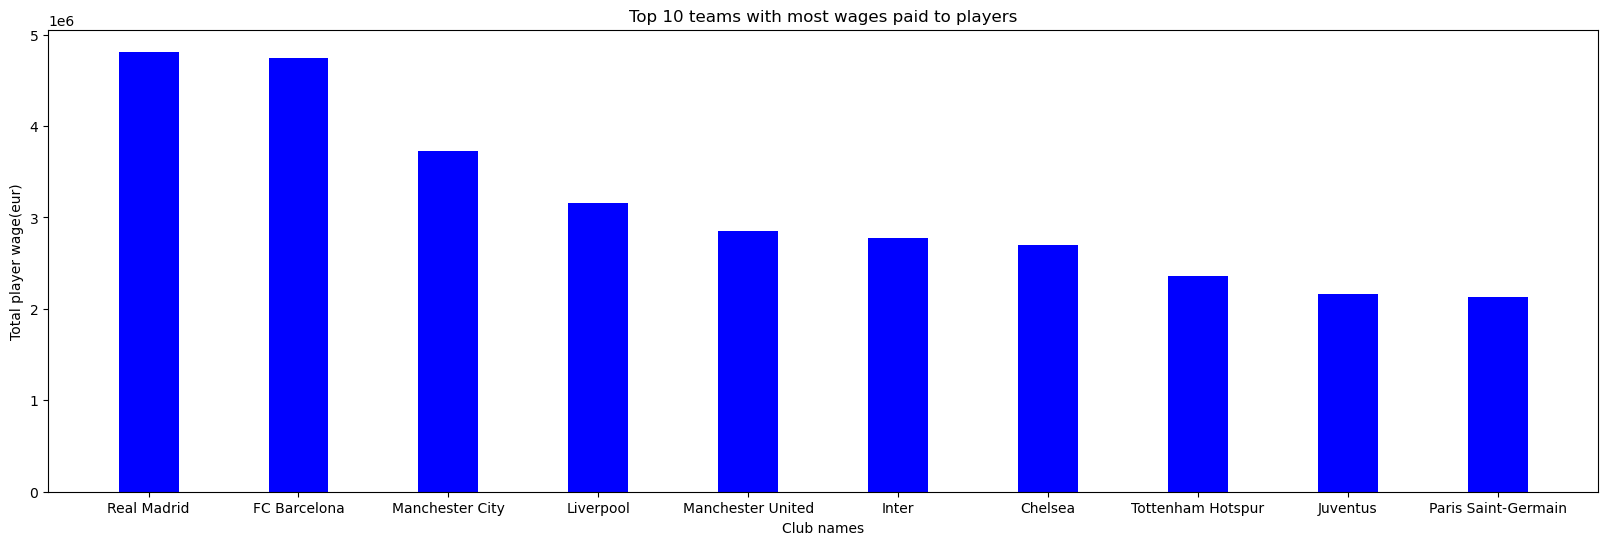

In [44]:
#Plotting the Club vs Total player wage graph for the top 10 teams
fig = pl.figure(figsize = (20, 6))

# Creating the bar plot
pl.bar(club["club_name"].head(10), club["wage_eur"].head(10), color ='blue', 
        width = 0.4)
pl.xlabel("Club names")
pl.ylabel("Total player wage(eur)")
pl.title("Top 10 teams with most wages paid to players")
pl.show()

The bar chart shows that Real Madrid and FC Barcelona pay the highest total wages to players, each around €5 million. Manchester City and Liverpool also pay substantial wages but less than the top two. Manchester United and Inter follow with lower total wages. Chelsea, Tottenham Hotspur, Juventus, and Paris Saint-Germain have the lowest total wages among the top 10. There is a significant disparity in wage expenditures among these elite teams, with Real Madrid and FC Barcelona leading by a large margin.

### Nationality analysis

 In this section we will get to know about the top 10 countries with most number of players who are in a club


In [45]:
#creating an array with all the countries present in the data set
country = np.array(df["nationality"])

In [46]:
#Removing duplicates
unique, counts = np.unique(country, return_counts=True) #removes duplicates and gives the amount of time the duplicates have occured

In [47]:
country_count = pd.DataFrame(counts,unique).reset_index() #creating a dataset from unique countries and count array
country_count = country_count.rename(columns = {0 : "Total_Players",
                               "index": "Country"})
country_count = country_count.sort_values(by = "Total_Players",ascending = False).reset_index()
country_count.drop("index",axis = 1,inplace = True)

In [48]:
country_count

,Country,Total_Players
0,England,1586
1,Germany,1136
2,Spain,1000
3,France,958
4,Argentina,878
...,...,...
155,Indonesia,1
156,Tanzania,1
157,São Tomé & Príncipe,1
158,Malawi,1


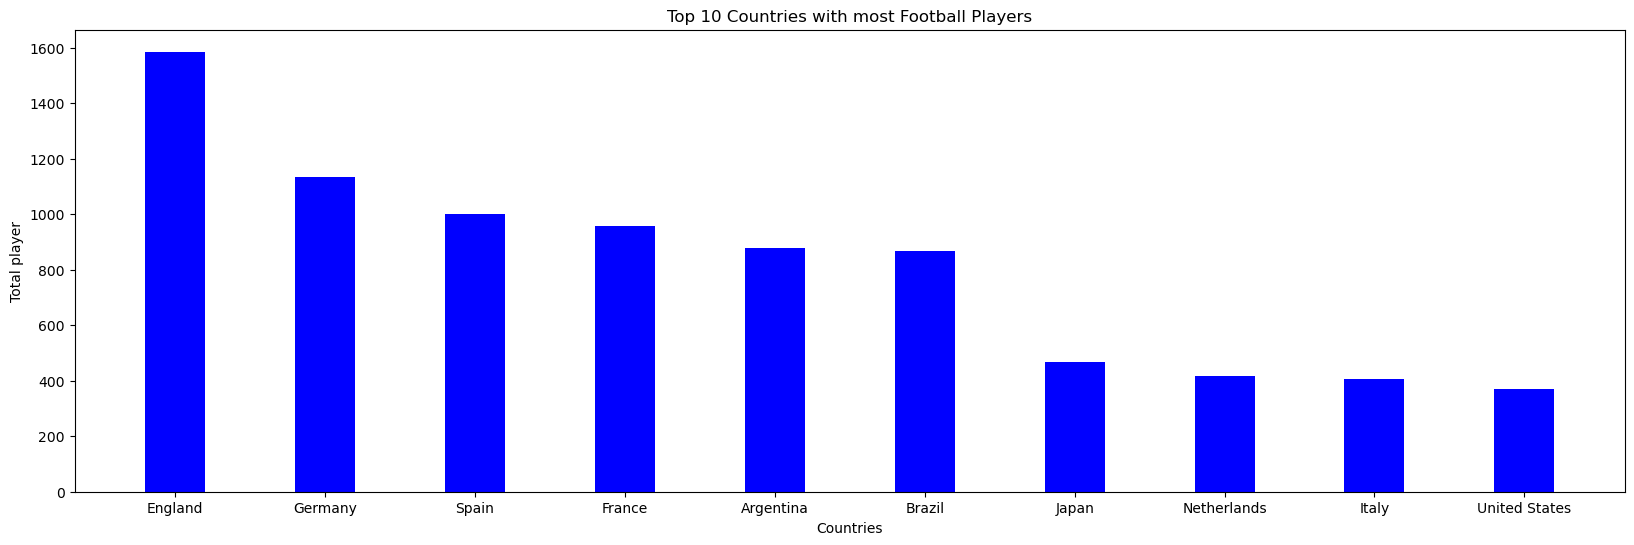

In [49]:
#Plotting the Nationality vs Total players graph for the top 10 countries
fig = pl.figure(figsize = (20, 6))

# Creating the bar plot
pl.bar(country_count["Country"].head(10), country_count["Total_Players"].head(10), color ='blue', 
        width = 0.4)
pl.xlabel("Countries")
pl.ylabel("Total player")
pl.title("Top 10 Countries with most Football Players")
pl.show()

The graph shows the top 10 countries with the most football players.

England is leading the pack with around 1,600 football players, Germany comes in second with about 1,200 players.
Spain and France are almost neck and neck, boasting around 1,000 players, Argentina and Brazil are also close competitors, with each country having about 800 players.

Japan has a respectable 400 players, The Netherlands, Italy, and the United States round out the list, each with fewer than 400 players, with Italy and the United States having the lowest numbers among the top 10.

The graph highlights England's dominance in terms of football player numbers, with Germany, Spain, and France also showing strong representation. The remaining countries, while having fewer players, still contribute significantly to the global football community.